# Actividad Guiada 2

### Extra Realizado

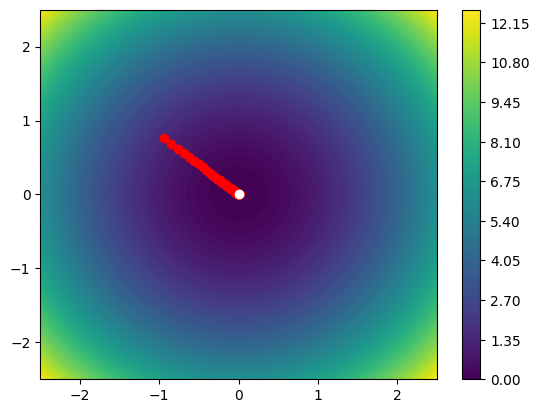

In [1]:
import math 
import matplotlib.pyplot as plt
import numpy as np
import random 


f=lambda X: X[0]**2+X[1]**2
df=lambda X: [2*X[0],2*X[1]] 

resolucion=100
rango=2.5
X=np.linspace(-rango,rango,resolucion)
Y=np.linspace(-rango,rango,resolucion)
Z=np.zeros((resolucion,resolucion))

for ix,x in enumerate(X):
    for iy,y in enumerate(X):
        Z[ix,iy]=f([x,y])

contour=plt.contourf(X,Y,Z,resolucion)
cbar=plt.colorbar(contour)


P=[random.uniform(-rango,rango),random.uniform(-rango,rango)]

plt.plot(P[0],P[1],'o',c='red')

TA=0.05

for i in range(0,500):
    grad=df(P)
    P[0],P[1]=P[0]-TA*grad[0], P[1]-TA*grad[1]
    plt.plot(P[0],P[1],'o',c='red')


plt.plot(P[0],P[1],'o',c='white')





# Actividad 2
 

Punto inicial: [3.2483976403659556, 0.9049643429149619]
Evaluación inicial: 0.30026515780776447
Número de iteraciones 466
Punto final: [3.2810871806801867, 1.4859948210584975]
Taza de apredizaje final: 0.005
Raíz encontrada: -0.9997287463069946


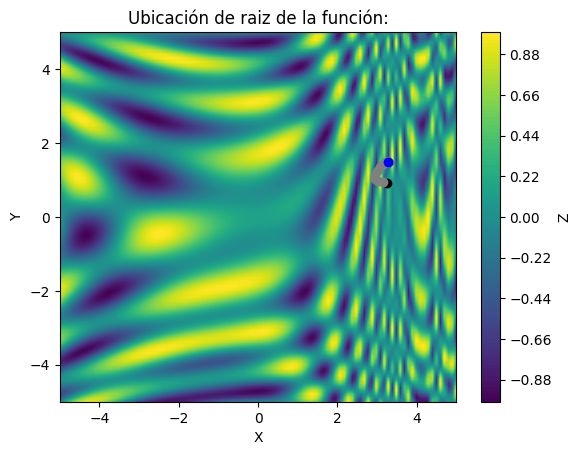

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import random


def f(X): return np.sin(1/2*X[0]**2-1/4*X[1]**2+3)*np.cos(2*X[0]+1-np.e**X[1])


def df(p):
    h = 0.01
    T = np.copy(p)
    grad = np.zeros(2)
    for it, th in enumerate(p):
        T[it] = T[it]+h
        grad[it] = (f(T)-f(p))/h
    return grad


res = 100

range = 5

X = np.linspace(-range, range, res)
Y = np.linspace(-range, range, res)
Z = np.zeros((res, res))


for ix, x in enumerate(X):
    for iy, y in enumerate(X):
        Z[ix, iy] = f([x, y])


contour = plt.contourf(X, Y, Z, res)
cbar = plt.colorbar(contour)
cbar.set_label("Z")
plt.xlabel("X")
plt.ylabel("Y")

p_0 = [random.uniform(-range+0.5, range-0.5), random.uniform(-range+0.5, range-0.5)]


print("Punto inicial: " + str(p_0))

plt.plot(p_0[0], p_0[1], 'o', c='black')

lr = 0.01

p_ev = p_0

ni = 0

z_ev = f(p_ev)

print("Evaluación inicial: " + str(z_ev))

while (ni < 20000 ):
    g = df(p_ev)
    nor=np.linalg.norm(g)
    #print(nor)
    if nor>1:   # seleccion de taza de aprendizaje basado en la norma del vector gradiente, mientras mas cercano sea de cero mas pequeño sera.
        lr=0.06
    elif nor>0.5 and nor<1:
        lr=0.03
    elif nor>0.1 and nor<0.5:
        lr=0.01
    elif nor>0 and nor<0.1:
        lr=0.005        
    #print(lr)
    p_ev[0], p_ev[1] = p_ev[0]-lr*g[0], p_ev[1]-lr*g[1]
    plt.plot(p_ev[0], p_ev[1], 'o', c='gray')
    z_ev = f(p_ev)
   # print(z_ev)
    if nor<1e-13:
        break
    ni+=1

plt.plot(p_ev[0], p_ev[1], 'o', c='blue')
plt.title("Ubicación de raiz de la función:")

print("Número de iteraciones " + str(ni))
print("Punto final: " + str(p_ev))
print("Taza de apredizaje final: " + str(lr))
print("Raíz encontrada: " + str(z_ev))

plt.show()
